# Project Name :  Iris Simple Classification

**Details: The project involves supervised classification with the target feature being "Species" and the other four features ("SepalLengthCm," "SepalWidthCm," "PetalLengthCm," "PetalWidthCm") being numeric. The goal is to classify the species of the iris flower based on these four measurements.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"G:\GIT_Project-2025\iris_project\data_sets\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(columns='Id', inplace=True)

**Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


               Null Count  Null Percentage
SepalLengthCm           0              0.0
SepalWidthCm            0              0.0
PetalLengthCm           0              0.0
PetalWidthCm            0              0.0
Species                 0              0.0


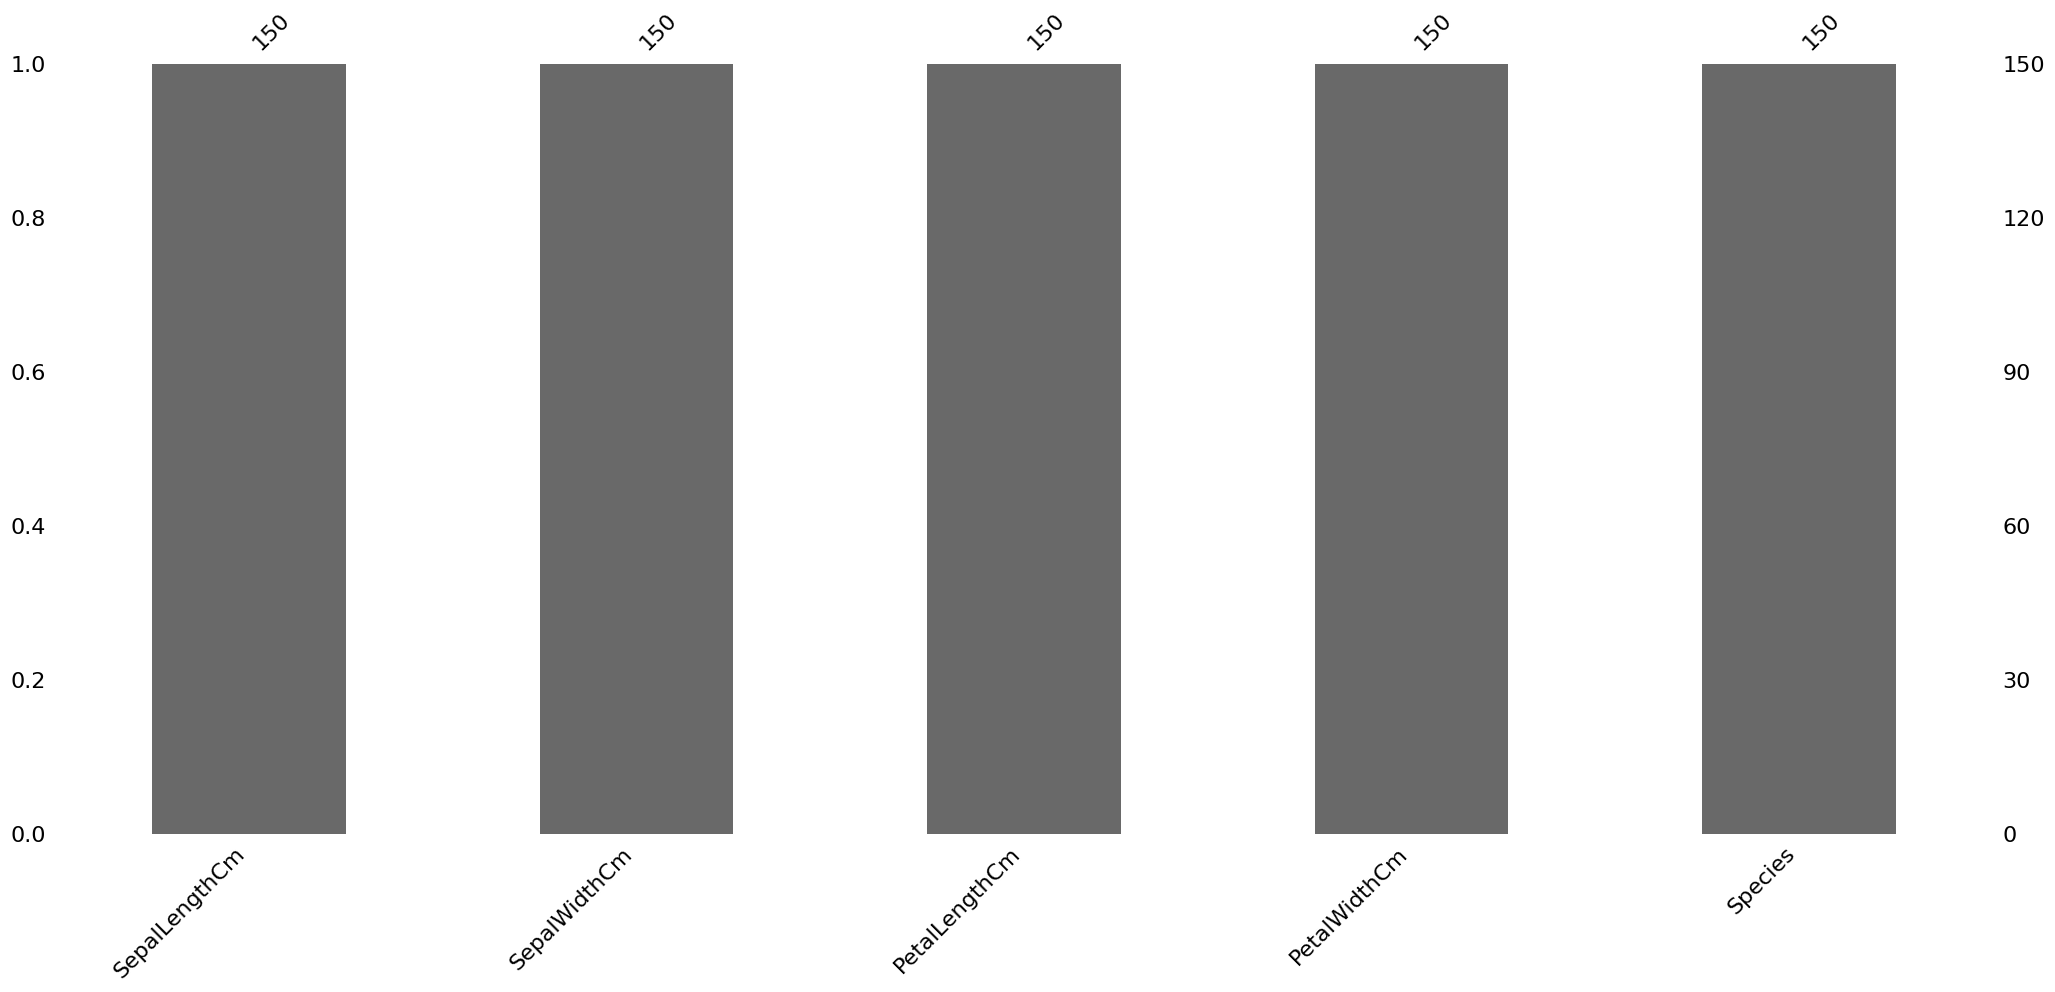

In [5]:
null_count = df.isnull().sum()
null_per = ((df.isnull().sum()/len(df))*100).round(2)

result_null = pd.DataFrame({'Null Count':null_count, 'Null Percentage':null_per})
print(result_null)
msno.bar(df)
plt.show()

In [6]:
df.duplicated().sum()

np.int64(3)

In [7]:
df.drop_duplicates(keep='first')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Note: SepalLengthCm- max(7.9),	SepalWidthCm-max(4.4)	PetalLengthCm-max(6.9)	PetalWidthCm(2.5)
SepalLengthCm- min(4.3),	SepalWidthCm-min(2)	PetalLengthCm-min(1)	PetalWidthmin(1)

**EDA**

In [10]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include='number').columns

print(f"Categorical features {cat_columns} \nNumerical features {num_columns}")

Categorical features Index(['Species'], dtype='object') 
Numerical features Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

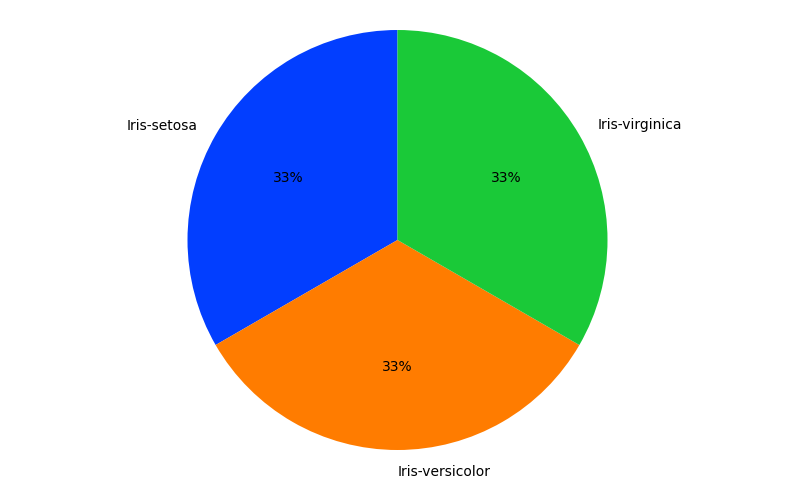

In [12]:
# Count the occurrences of each species
species_count = df['Species'].value_counts()

# Labels for each species
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Define Seaborn color palette to use 
palette = sns.color_palette('bright')

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(species_count, labels=labels, colors=palette, autopct='%.0f%%', startangle=90)
plt.axis('equal')
plt.show()

Balance data is good for analysis and modeling.

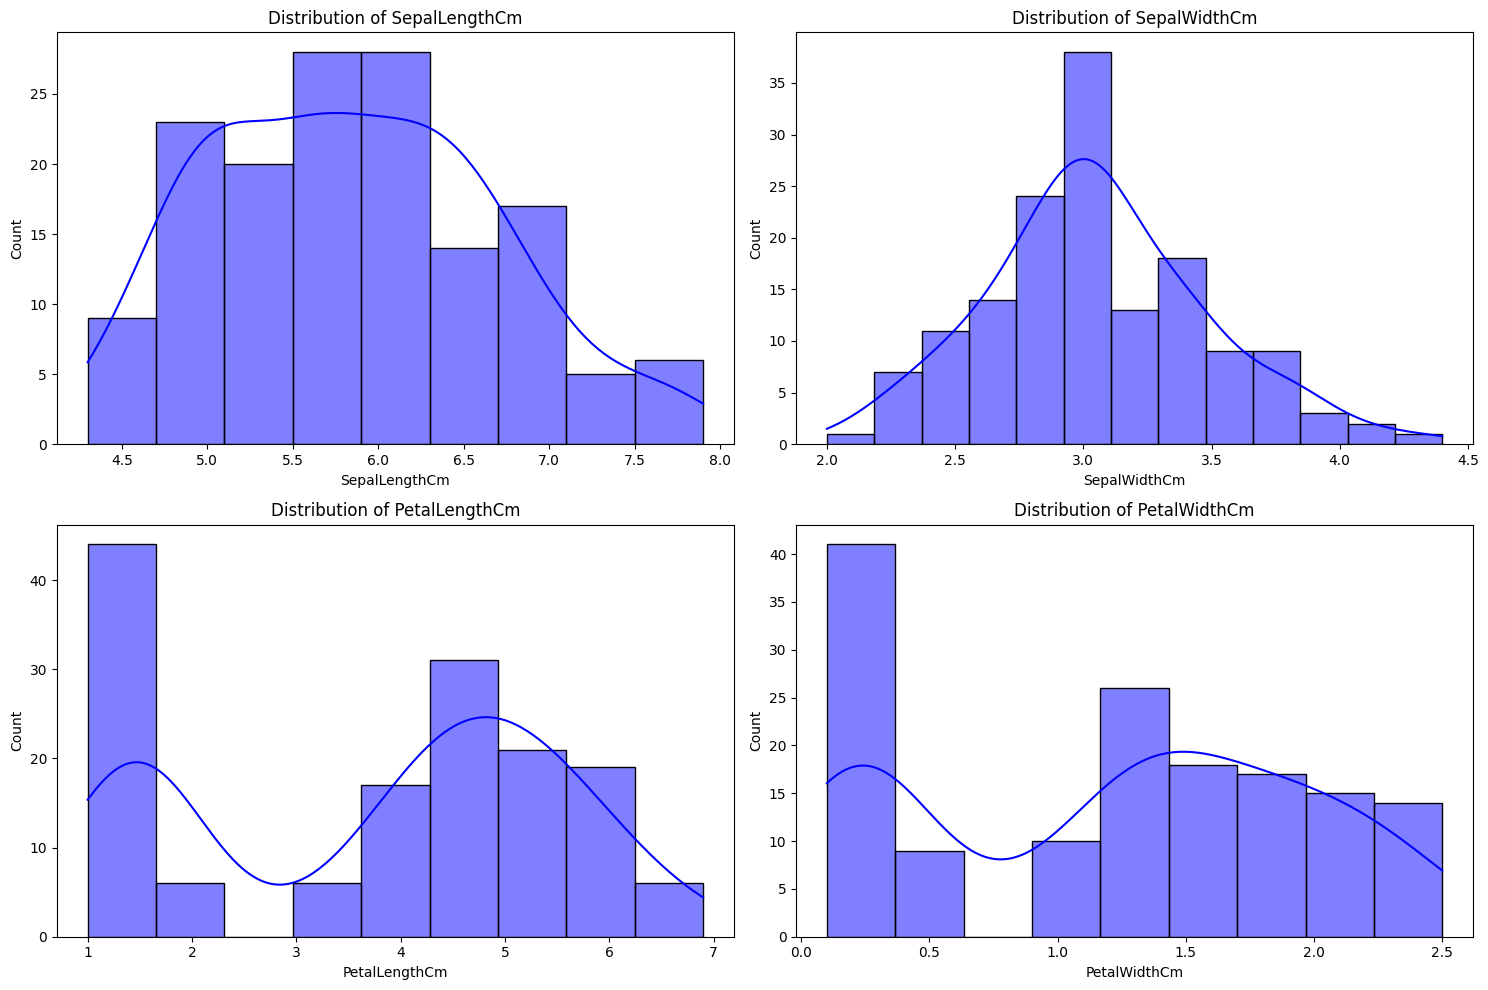

In [13]:
# Univariate Analysis for numerical features
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

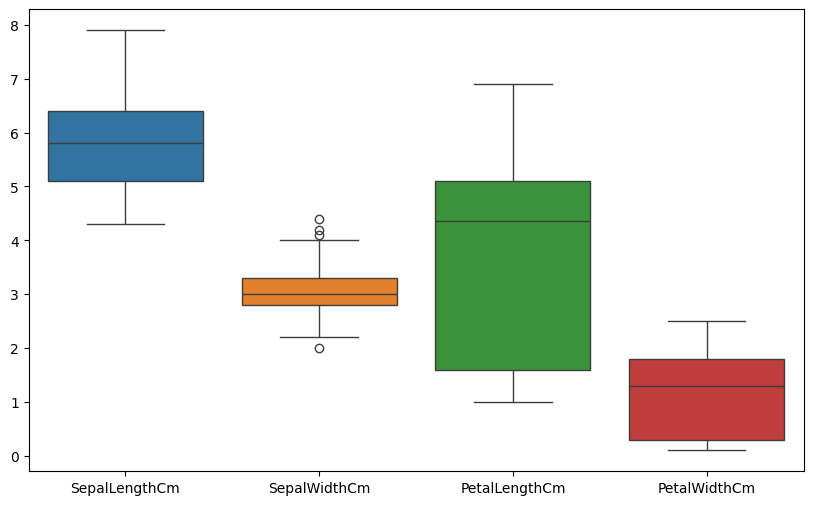

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

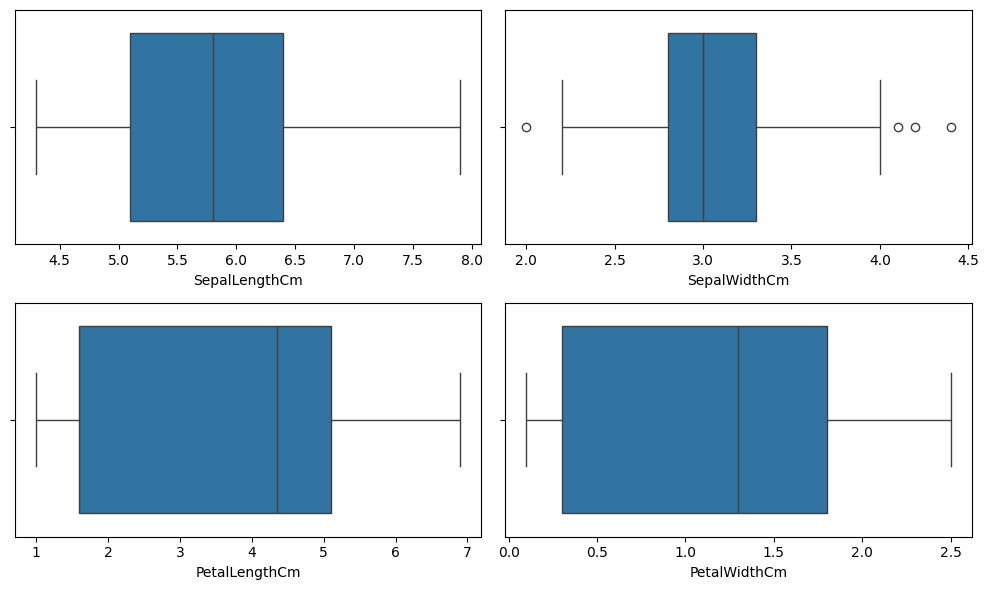

In [15]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,6))

for i, col in enumerate(num_columns,1):
      plt.subplot(2,2,i)
      sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()


In [16]:
for col in num_columns:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1-IQR*1.5
      upper_bound = Q3+IQR*1.5

      df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

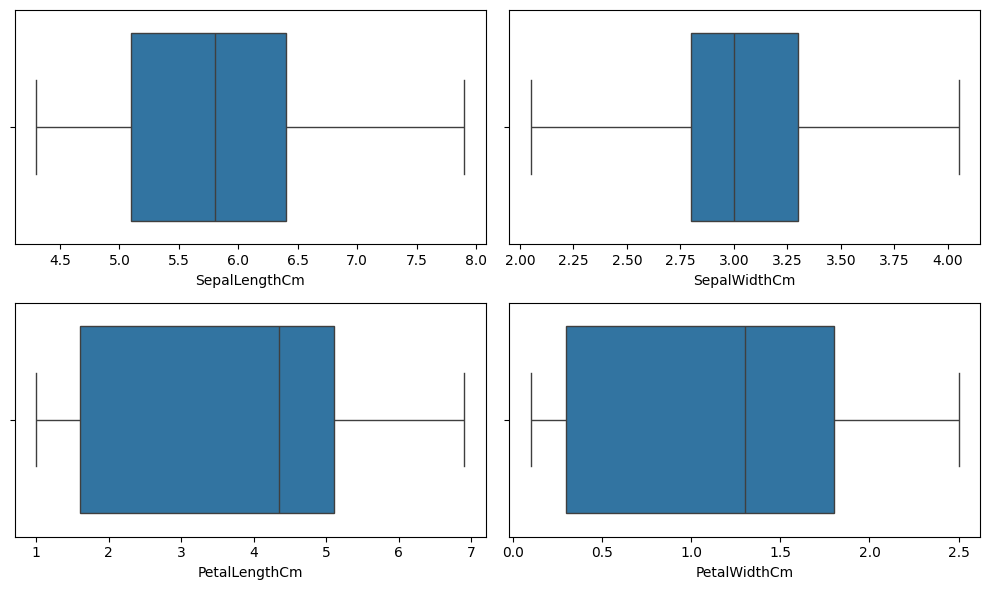

In [17]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,6))

for i, col in enumerate(num_columns,1):
      plt.subplot(2,2,i)
      sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [18]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_columns:
      skewness = df[col].skew()

      if skewness>0:
            skew_type="Right Skew"

      elif skewness<0:
            skew_type="Left Skew"

      else: 
            skew_type="Approximately normal"
      print(f"column={col}: skewness ={skewness} Distribution={skew_type}")

column=SepalLengthCm: skewness =0.3149109566369728 Distribution=Right Skew
column=SepalWidthCm: skewness =0.20709413403739355 Distribution=Right Skew
column=PetalLengthCm: skewness =-0.27446425247378287 Distribution=Left Skew
column=PetalWidthCm: skewness =-0.10499656214412734 Distribution=Left Skew


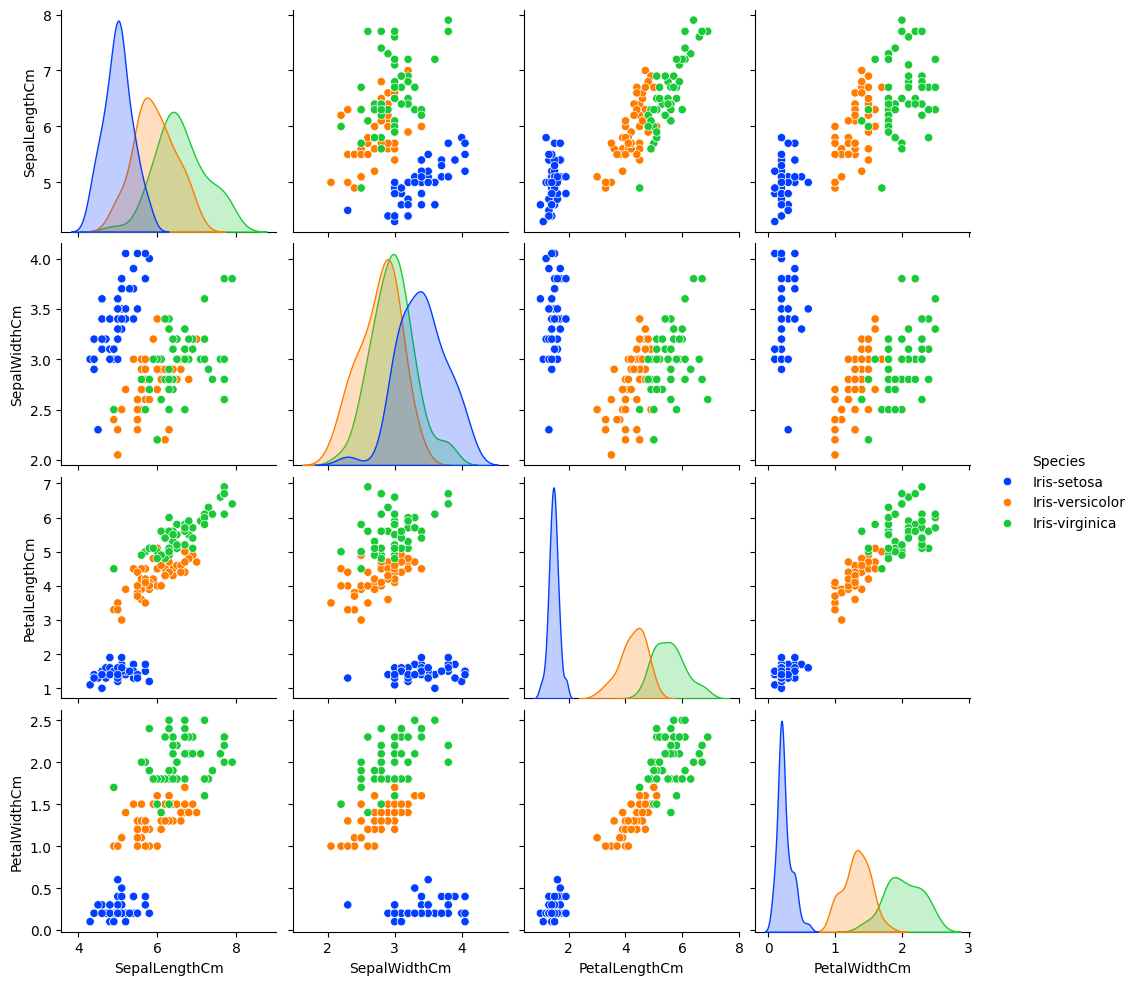

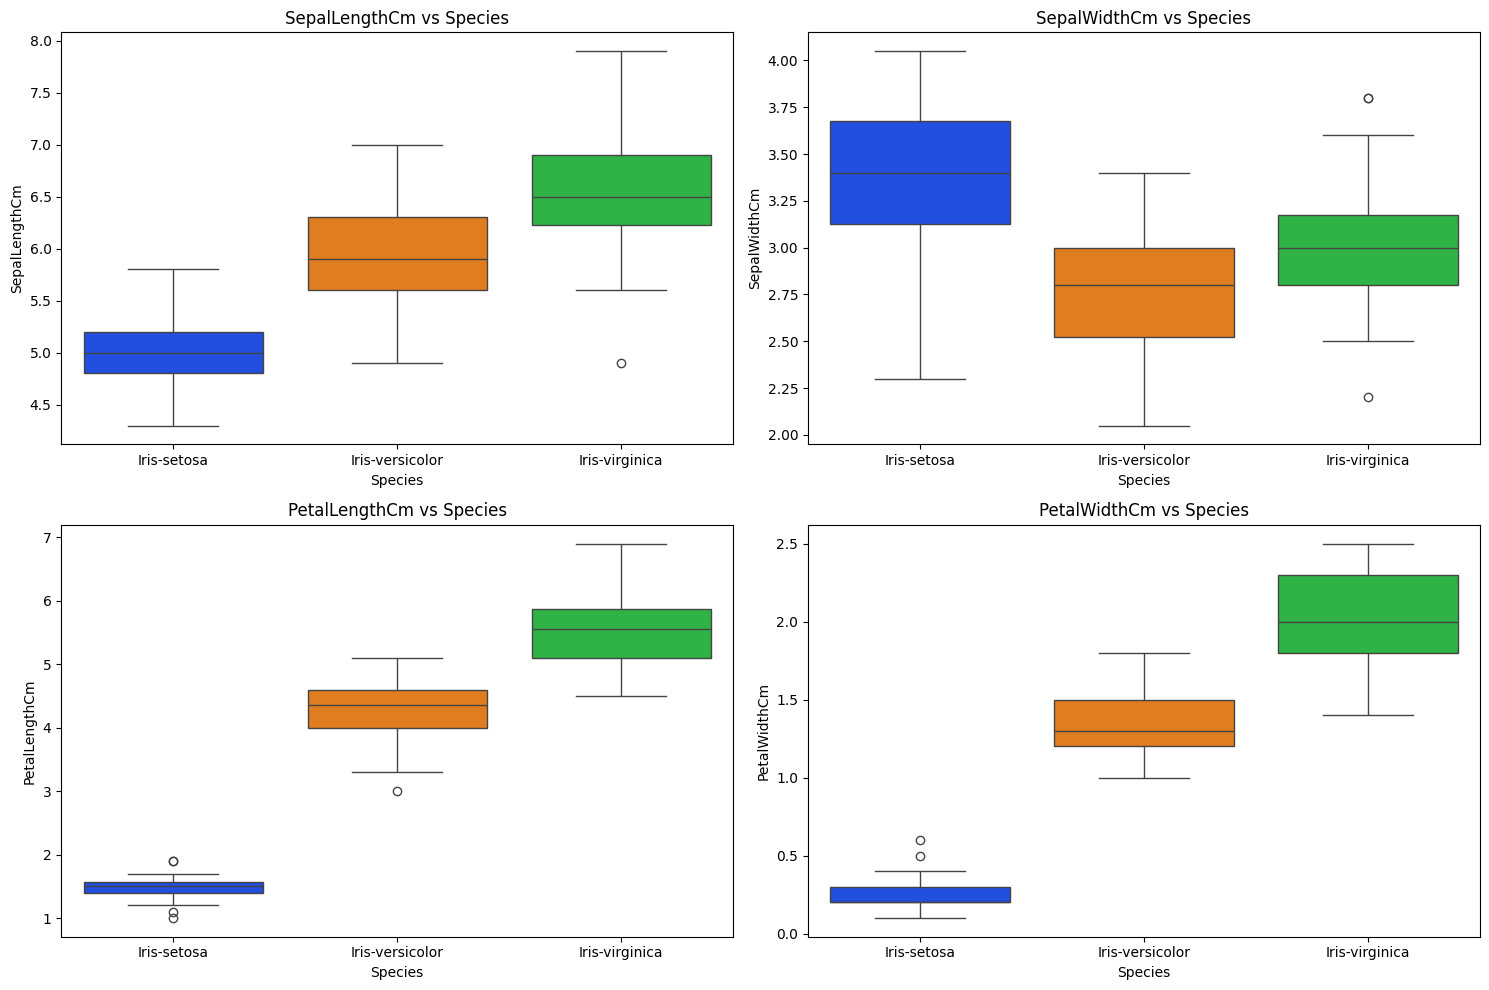

In [19]:
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Bivariate Analysis: Pair plot to see relationships between numerical features and target
sns.pairplot(df, hue='Species', palette='bright', diag_kind='kde')
plt.show()

# Bivariate Analysis: Box plots to compare features with the target variable (Species)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=df, palette='bright')
    plt.title(f'{feature} vs Species')
plt.tight_layout()
plt.show()

The skewness values in the data are between -0.5 and 0.5, your distributions are already approximately normal.

**Feature Engineering**

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


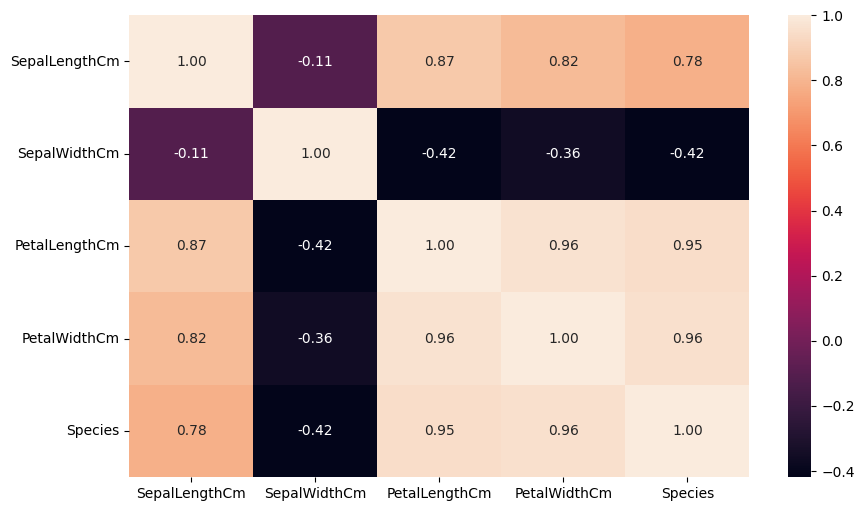

In [21]:
matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.show()

Feature Selection:
Since PetalLengthCm and PetalWidthCm are highly correlated, you could consider using only one of them to reduce multicollinearity, particularly if using a linear model.

Alternatively, you could use a model that handles multicollinearity well, such as tree-based models (e.g., Random Forest or Gradient Boosting).

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the data (only for numerical features)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         Feature         VIF
0  SepalLengthCm  268.474441
1   SepalWidthCm   99.414482
2  PetalLengthCm  173.545324
3   PetalWidthCm   55.363222


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the Iris data
# Define X (features) and y (target)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit RandomForestClassifier on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

         Feature  Importance
3   PetalWidthCm    0.430667
2  PetalLengthCm    0.413375
0  SepalLengthCm    0.118521
1   SepalWidthCm    0.037436


The two petal features (PetalWidthCm and PetalLengthCm) together account for around 84% of the total importance, highlighting their significance in distinguishing the species.

Sepal features, especially SepalWidthCm, contribute much less to the classification task. This implies that they are either less variable across species or less indicative of species differences.

These results suggest that focusing on petal dimensions would provide the most significant insights in this classification task, while the sepal features, especially SepalWidthCm, could potentially be excluded without heavily impacting model performance.

In [25]:
df.to_csv(r"G:\GIT_Project-2025\iris_project\data_sets\preprocess_data.csv", index=False)